## K-Means Clustering in Color Quantization

Color quantization is a process in image processing that reduces the number of colors used in an image while attempting to maintain its visual appearance. The goal of quantization is to reduce the loss of visual information while reducing the color depth.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt , matplotlib.image as mpimg
import seaborn as sns

img_data = mpimg.imread('./Datasets/palm_trees.jpg') # for reading the pixel values of image

In [2]:
img_data , img_data.shape

(array([[[ 25,  89, 127],
         [ 25,  89, 127],
         [ 25,  89, 127],
         ...,
         [ 23,  63,  98],
         [ 51,  91, 127],
         [ 50,  90, 126]],
 
        [[ 25,  89, 127],
         [ 25,  89, 127],
         [ 25,  89, 127],
         ...,
         [ 31,  71, 106],
         [ 48,  88, 124],
         [ 47,  90, 125]],
 
        [[ 25,  89, 127],
         [ 25,  89, 127],
         [ 25,  89, 127],
         ...,
         [ 39,  79, 114],
         [ 42,  85, 120],
         [ 44,  88, 123]],
 
        ...,
 
        [[  4,   4,   6],
         [  4,   4,   6],
         [  4,   4,   6],
         ...,
         [  9,   9,  11],
         [  9,   9,  11],
         [  9,   9,  11]],
 
        [[  3,   3,   5],
         [  3,   3,   5],
         [  3,   3,   5],
         ...,
         [  8,   8,  10],
         [  8,   8,  10],
         [  8,   8,  10]],
 
        [[  4,   4,   6],
         [  4,   4,   6],
         [  4,   4,   6],
         ...,
         [  9,   9,  11],
  

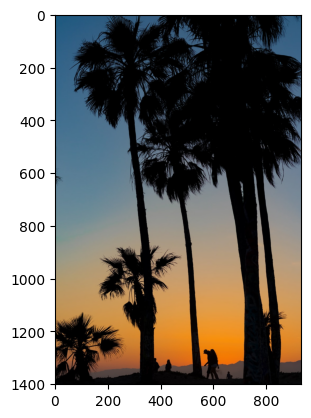

In [3]:
plt.imshow(img_data) # our image 

the (Height , Width , rgb-value) is 3D and must be converted into 2D before any task.

In [4]:
h , w , c = img_data.shape

In [5]:
img_data_2D = img_data.reshape(h*w , c)

In [6]:
img_data_2D

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [7]:
data = pd.DataFrame(data=img_data_2D , columns=['R' , 'G' , 'B'])

In [8]:
data

,R,G,B
0,25,89,127
1,25,89,127
2,25,89,127
3,25,89,127
4,25,89,127
...,...,...,...
1308529,8,8,10
1308530,9,9,11
1308531,9,9,11
1308532,10,10,12


In [13]:
from sklearn.cluster import KMeans

Model = KMeans(n_clusters=6 , random_state=42)

labels = Model.fit_predict(data) # can be done with `img_data_2D` too.

In [14]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [15]:
# for knowing cluster_centers
Model.cluster_centers_

array([[  2.77058309,   2.57124563,   3.68132513],
       [191.31149013, 154.49773586, 109.7555489 ],
       [ 71.33451588, 109.28411433, 137.56015178],
       [218.9928282 , 135.65641108,  47.38332267],
       [ 67.35721379,  61.68101759,  61.9510675 ],
       [136.82331401, 143.76282594, 143.89456654]])

In [16]:
rgb_codes = Model.cluster_centers_.round(0).astype(int)

In [17]:
rgb_codes

array([[  3,   3,   4],
       [191, 154, 110],
       [ 71, 109, 138],
       [219, 136,  47],
       [ 67,  62,  62],
       [137, 144, 144]])

In [22]:
Quantized_img = np.reshape(rgb_codes[labels] , (h , w , c)) 

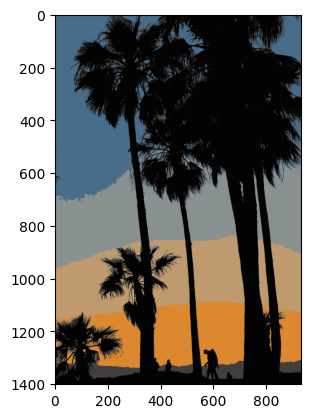

In [23]:
plt.imshow(Quantized_img)